In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install gensim

In [3]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 15.9 MB/s eta 0:00:00


In [4]:
!pip install nltk

In [5]:
import pandas as pd
import gensim
from gensim import corpora
import matplotlib.pyplot as plt
from tqdm import tqdm
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from gensim.models import CoherenceModel
from gensim.models import LdaMulticore

# tqdm을 사용할 수 있도록 설정
tqdm.pandas()

# 불용어 제거 함수
def remove_stopwords(tokens, stopwords):
    # 불용어 및 한글자 명사 제거
    return [word for word in tokens if word not in stopwords and len(word) > 1]


In [6]:
df = pd.read_csv("/content/drive/MyDrive/PML_PAPER/data/1_2_Processed_SuperSol_Sentences.csv")

stopwords = set([
    "신한", "쏠", "앱", "슈퍼쏠", "어플", "은행", "기능", "슈퍼", "사용"
])

df['nouns'] = df['nouns'].progress_apply(eval)
df.rename(columns={'adjectives': 'adj'}, inplace=True)
df['adj'] = df['adj'].progress_apply(eval)
print(len(df))

# 'nouns'와 'adj' 길이의 합이 5 이상인 리뷰만 필터링
df_filtered = df[df['nouns'].apply(len) + df['adj'].apply(len) >= 7]

# 'nouns' 컬럼에서 NaN 값을 가진 행을 필터링
df_filtered = df_filtered[df_filtered['nouns'].apply(lambda x: isinstance(x, list) and len(x) > 0)]

# 불용어 및 한글자 명사 제거
df_filtered['nouns'] = df_filtered['nouns'].progress_apply(lambda x: remove_stopwords(x, stopwords))

# LDA 모델 학습을 위한 텍스트 준비
texts = df_filtered['nouns'].tolist()

# Gensim Dictionary 생성
dictionary = corpora.Dictionary(texts)

# 코퍼스 생성
corpus = [dictionary.doc2bow(text) for text in texts]

# LDA 모델 학습
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)

# LDA 모델의 토픽 출력
topics = lda_model.print_topics(num_words=15)
for topic in topics:
    print(topic)

# Visualize the topics
pyLDAvis.enable_notebook()
vis_data = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis_data)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 3887/3887 [00:00<00:00, 17798.03it/s]


3887


100%|██████████| 880/880 [00:00<00:00, 163072.70it/s]


(0, '0.043*"카드" + 0.036*"기존" + 0.035*"통합" + 0.031*"로그인" + 0.029*"결제" + 0.024*"패턴" + 0.022*"설치" + 0.021*"내역" + 0.015*"불편" + 0.014*"증권" + 0.012*"거래" + 0.011*"입출금" + 0.011*"메모" + 0.011*"뱅크" + 0.010*"인증서"')
(1, '0.053*"인증" + 0.050*"가입" + 0.022*"인증서" + 0.022*"설치" + 0.018*"기존" + 0.018*"등록" + 0.016*"신분증" + 0.015*"로그인" + 0.015*"오류" + 0.013*"계좌" + 0.012*"뱅크" + 0.011*"회원" + 0.011*"삭제" + 0.010*"기기" + 0.009*"본인"')
(2, '0.057*"알림" + 0.039*"불편" + 0.035*"계좌" + 0.022*"설정" + 0.022*"잔액" + 0.021*"입출금" + 0.020*"카드" + 0.019*"확인" + 0.019*"이용" + 0.018*"기존" + 0.014*"결제" + 0.013*"통합" + 0.012*"내역" + 0.012*"이체" + 0.011*"업데이트"')
(3, '0.030*"결제" + 0.027*"바이러스" + 0.025*"인증" + 0.018*"설치" + 0.015*"번호" + 0.014*"카드" + 0.013*"등록" + 0.013*"가능" + 0.013*"추가" + 0.012*"이벤트" + 0.011*"포인트" + 0.010*"검출" + 0.010*"종료" + 0.010*"전화" + 0.009*"통합"')
(4, '0.040*"카드" + 0.031*"결제" + 0.027*"기존" + 0.023*"설치" + 0.022*"통합" + 0.012*"화면" + 0.010*"다음" + 0.010*"필요" + 0.010*"시간" + 0.010*"페이" + 0.010*"개별" + 0.010*"이동" + 0.010*"서비스" + 0.010*"메뉴" +

In [8]:
# 한글 글꼴을 설치
!apt-get -qq -y install fonts-nanum


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Selecting previously unselected package fonts-nanum.
(Reading database ... 123632 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


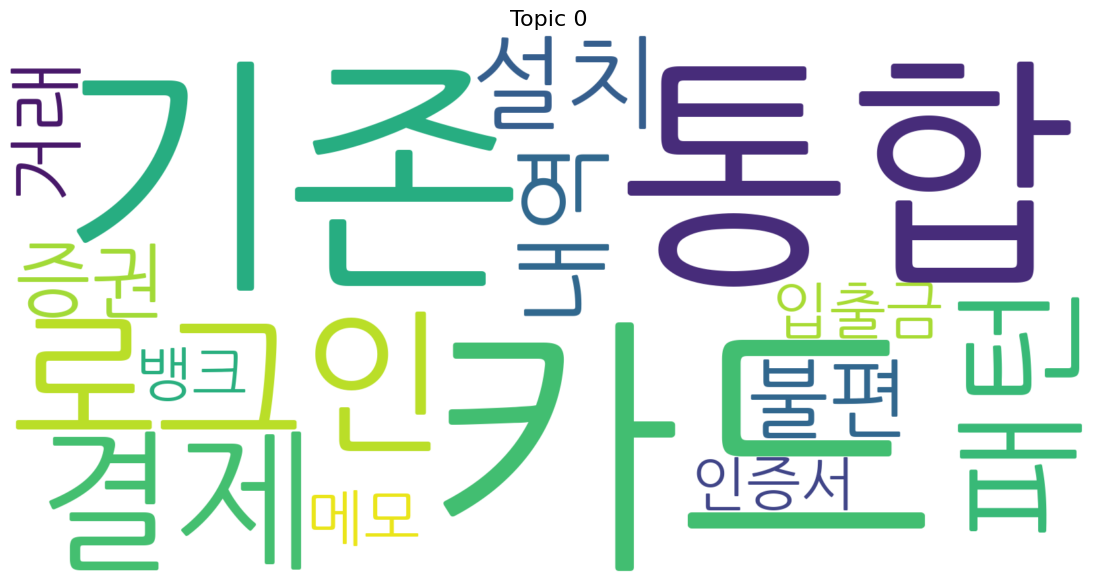

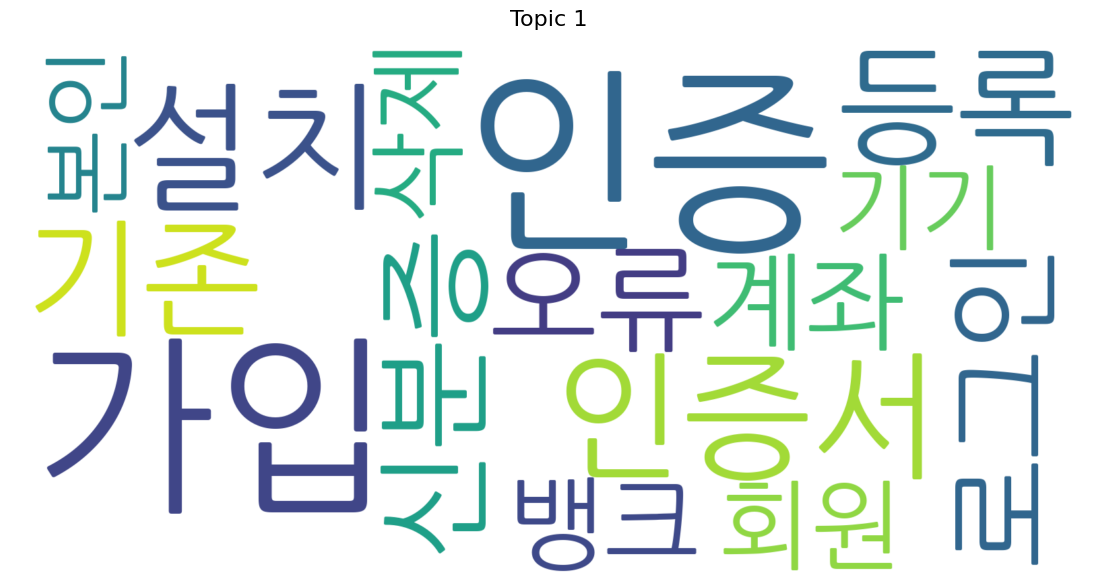

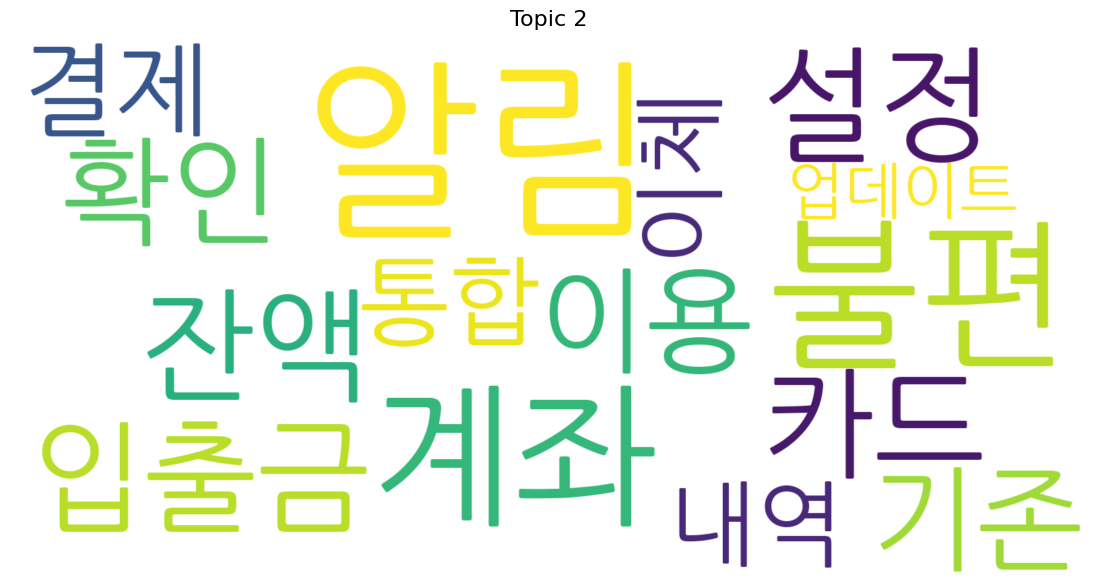

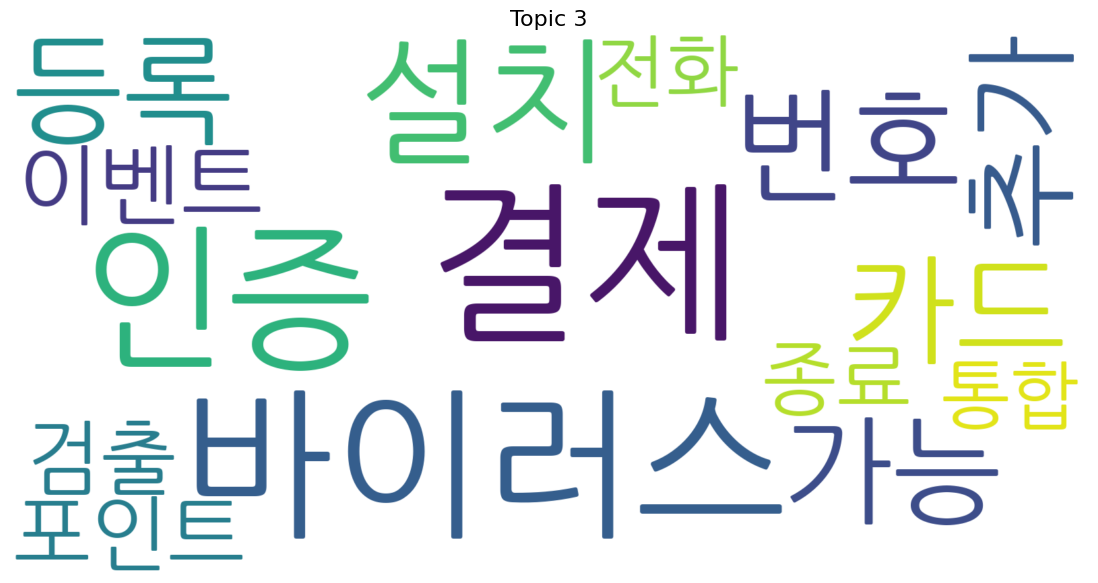

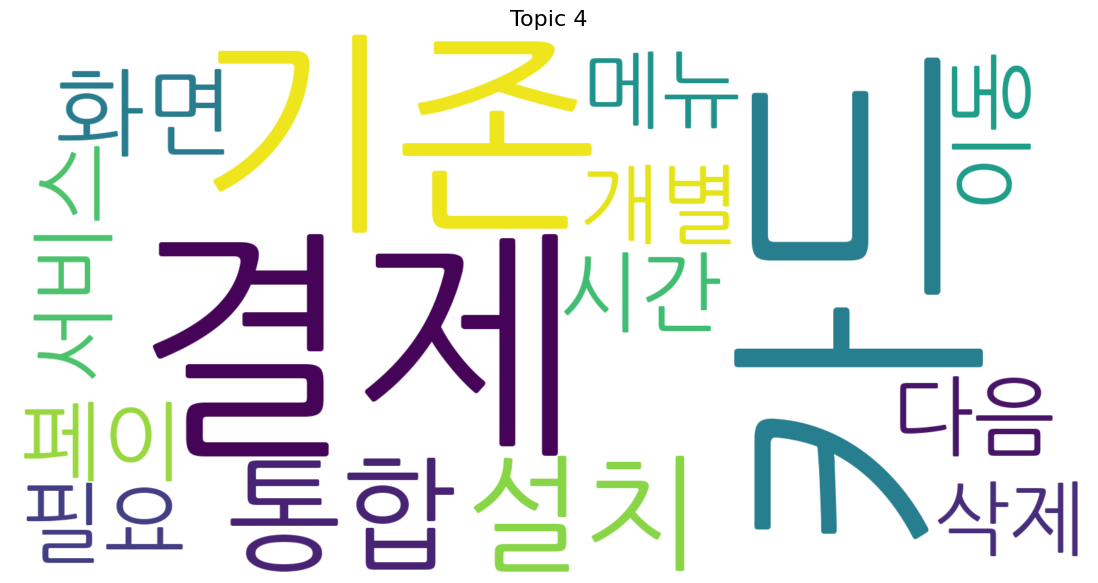

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 한글 글꼴 경로 설정 (Colab에서는 /usr/share/fonts/truetype/nanum/NanumGothic.ttf 경로를 사용할 수 있습니다.)
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # Colab에서 사용할 때 경로

# 각 토픽에 대해 워드 클라우드 생성
def generate_wordcloud_for_topic(lda_model, topic_num, num_words=15):
    # 토픽에서 주요 단어를 추출
    words = lda_model.show_topic(topic_num, num_words)
    word_dict = {word: weight for word, weight in words}

    # 워드 클라우드 생성 (한글 글꼴 적용)
    wordcloud = WordCloud(font_path=font_path, width=1600, height=800, background_color='white').generate_from_frequencies(word_dict)

    # 워드 클라우드 표시 (가로로 긴 화면 설정)
    plt.figure(figsize=(15, 7))  # 가로로 긴 크기 설정
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # 축 숨기기
    plt.title(f"Topic {topic_num}", fontsize=16)
    plt.show()

# LDA 모델에서 각 토픽에 대해 워드 클라우드 생성
num_topics = 5  # 토픽 수에 맞게 설정
for i in range(num_topics):
    generate_wordcloud_for_topic(lda_model, i)


In [15]:
# LDA 모델 학습을 위한 텍스트 준비
df = pd.read_csv("/content/drive/MyDrive/PML_PAPER/data/1_2_Processed_SolBank_Sentences.csv")  # 파일 경로를 적어주세요.

# 불용어 리스트 (사용자가 직접 정의)
stopwords = set([
    "신한", "쏠뱅크", "앱", "어플", "은행", "기능", "사용"
])

df['nouns'] = df['nouns'].progress_apply(eval)
df.rename(columns={'adjectives': 'adj'}, inplace=True)
df['adj'] = df['adj'].progress_apply(eval)

# 'nouns'와 'adj' 길이의 합이 5 이상인 리뷰만 필터링
df_filtered = df[df['nouns'].apply(len) + df['adj'].apply(len) >= 7]

# 'nouns' 컬럼에서 NaN 값을 가진 행을 필터링
df_filtered = df_filtered[df_filtered['nouns'].apply(lambda x: isinstance(x, list) and len(x) > 0)]

# 불용어 및 한글자 명사 제거
df_filtered['nouns'] = df_filtered['nouns'].progress_apply(lambda x: remove_stopwords(x, stopwords))

# LDA 모델 학습을 위한 텍스트 준비
texts = df_filtered['nouns'].tolist()

# Gensim Dictionary 생성
dictionary = corpora.Dictionary(texts)

# 코퍼스 생성
corpus = [dictionary.doc2bow(text) for text in texts]

# LDA 모델 학습
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)

# LDA 모델의 토픽 출력
topics = lda_model.print_topics(num_words=15)
for topic in topics:
    print(topic)

# Visualize the topics
pyLDAvis.enable_notebook()
vis_data = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis_data)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 7870/7870 [00:00<00:00, 220050.88it/s]


(0, '0.052*"오류" + 0.042*"업데이트" + 0.029*"접속" + 0.029*"문제" + 0.027*"실행" + 0.020*"설치" + 0.018*"삭제" + 0.017*"화면" + 0.017*"로그인" + 0.013*"해결" + 0.013*"고객" + 0.011*"먹통" + 0.011*"서버" + 0.011*"자체" + 0.010*"네트워크"')
(1, '0.023*"뱅킹" + 0.022*"이용" + 0.018*"금융" + 0.014*"업무" + 0.014*"오픈" + 0.013*"서비스" + 0.012*"시간" + 0.012*"가입" + 0.011*"모바일" + 0.011*"결제" + 0.011*"이벤트" + 0.011*"편리" + 0.010*"카드" + 0.010*"하루" + 0.009*"메뉴"')
(2, '0.120*"인증" + 0.030*"번호" + 0.027*"가입" + 0.020*"문자" + 0.019*"신분증" + 0.017*"전화" + 0.016*"대면" + 0.015*"확인" + 0.015*"본인" + 0.014*"쓰레기" + 0.013*"휴대폰" + 0.012*"인식" + 0.011*"시간" + 0.011*"통화" + 0.010*"최악"')
(3, '0.094*"로그인" + 0.057*"인증서" + 0.055*"등록" + 0.054*"지문" + 0.028*"인식" + 0.022*"공인" + 0.020*"입력" + 0.020*"계좌" + 0.019*"오류" + 0.017*"설정" + 0.017*"번호" + 0.014*"비밀번호" + 0.014*"보안" + 0.012*"비번" + 0.012*"타행"')
(4, '0.066*"이체" + 0.053*"계좌" + 0.040*"불편" + 0.027*"업데이트" + 0.016*"조회" + 0.013*"화면" + 0.013*"확인" + 0.012*"기존" + 0.011*"거래" + 0.011*"카드" + 0.011*"잔액" + 0.010*"뱅크" + 0.010*"입금" + 0.010*"내역

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


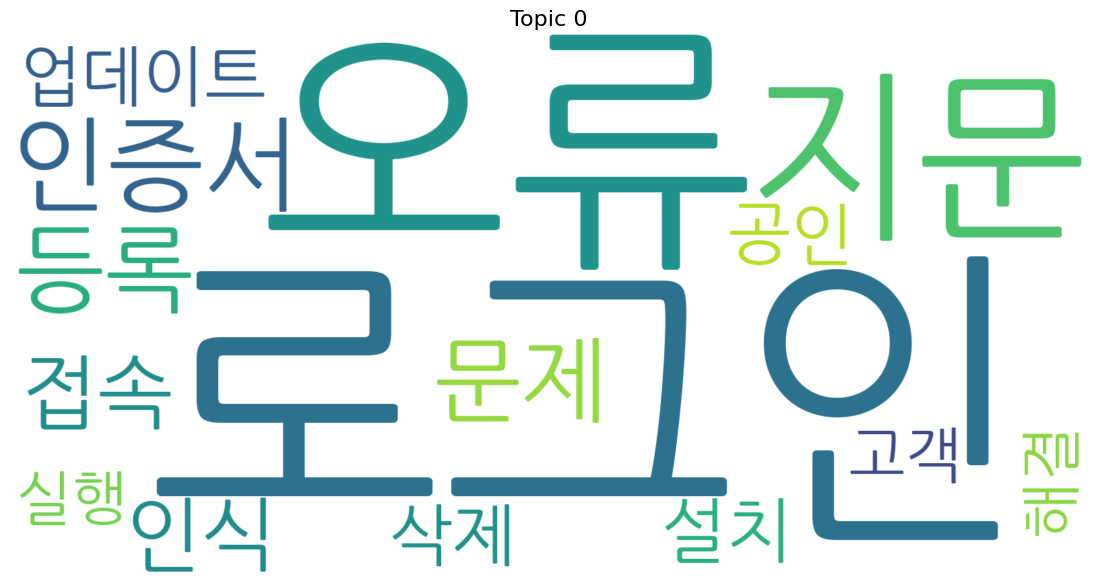

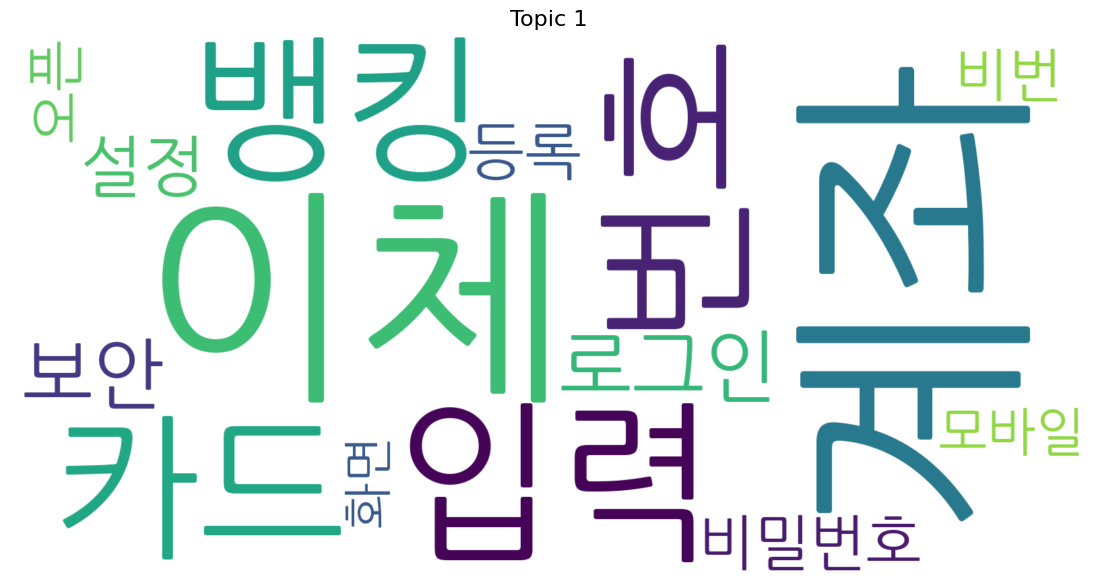

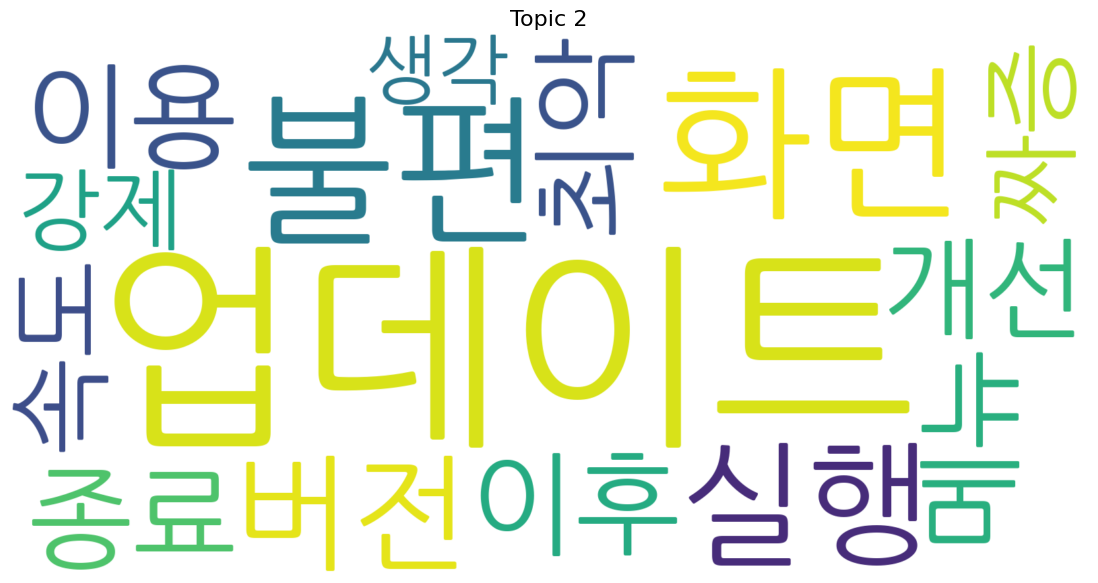

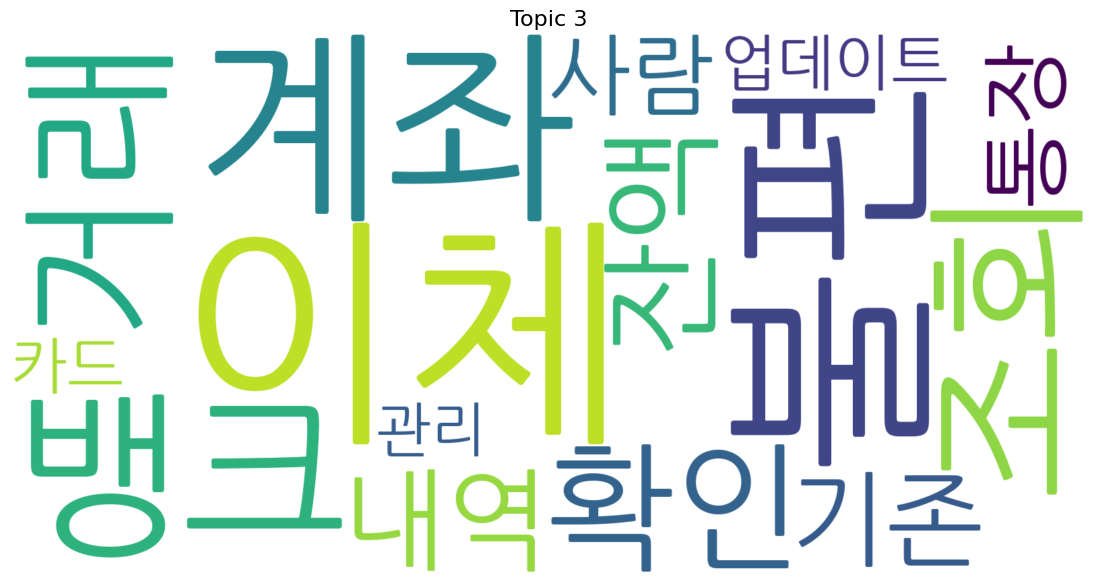

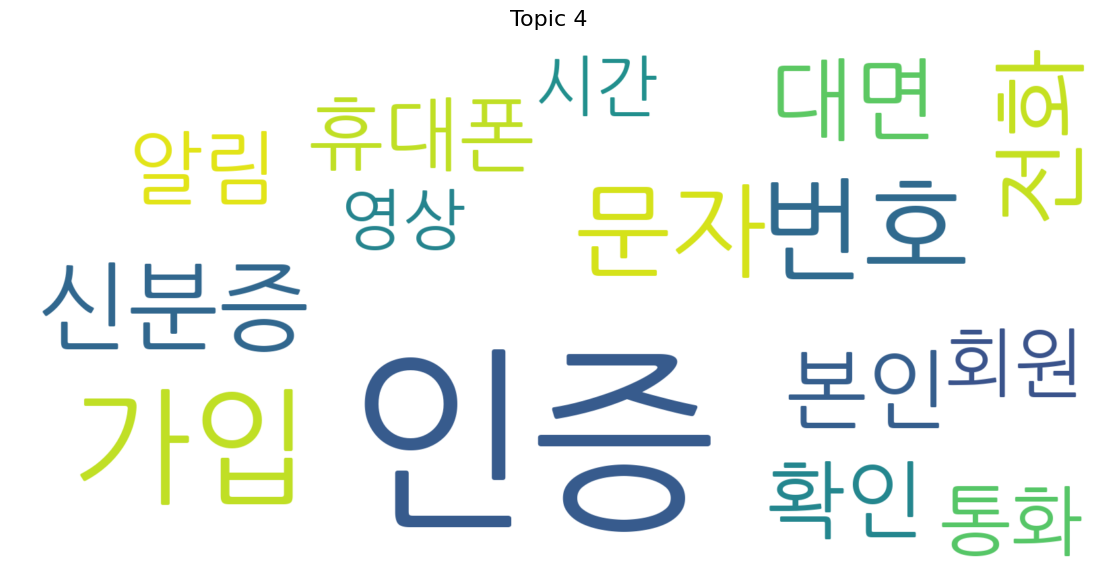

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 한글 글꼴 경로 설정 (Colab에서는 /usr/share/fonts/truetype/nanum/NanumGothic.ttf 경로를 사용할 수 있습니다.)
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # Colab에서 사용할 때 경로

# 각 토픽에 대해 워드 클라우드 생성
def generate_wordcloud_for_topic(lda_model, topic_num, num_words=15):
    # 토픽에서 주요 단어를 추출
    words = lda_model.show_topic(topic_num, num_words)
    word_dict = {word: weight for word, weight in words}

    # 워드 클라우드 생성 (한글 글꼴 적용)
    wordcloud = WordCloud(font_path=font_path, width=1600, height=800, background_color='white').generate_from_frequencies(word_dict)

    # 워드 클라우드 표시 (가로로 긴 화면 설정)
    plt.figure(figsize=(15, 7))  # 가로로 긴 크기 설정
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # 축 숨기기
    plt.title(f"Topic {topic_num}", fontsize=16)
    plt.show()

# LDA 모델에서 각 토픽에 대해 워드 클라우드 생성
num_topics = 5  # 토픽 수에 맞게 설정
for i in range(num_topics):
    generate_wordcloud_for_topic(lda_model, i)


In [16]:
# LDA 모델 학습을 위한 텍스트 준비
df = pd.read_csv("/content/drive/MyDrive/PML_PAPER/data/1_2_Processed_KBstar_Sentences.csv")  # 파일 경로를 적어주세요.

# 불용어 리스트 (사용자가 직접 정의)
stopwords = set([
    "KB", "스타뱅킹", "앱", "어플", "은행", "스타", "뱅킹", "국민", "편리", "이용", "사용", "방문", "친절", "감사", "국민은행"
])

df['nouns'] = df['nouns'].progress_apply(eval)
df.rename(columns={'adjectives': 'adj'}, inplace=True)
df['adj'] = df['adj'].progress_apply(eval)

# 'nouns'와 'adj' 길이의 합이 5 이상인 리뷰만 필터링
df_filtered = df[df['nouns'].apply(len) + df['adj'].apply(len) >= 5]

# 'nouns' 컬럼에서 NaN 값을 가진 행을 필터링
df_filtered = df_filtered[df_filtered['nouns'].apply(lambda x: isinstance(x, list) and len(x) > 0)]

# 불용어 및 한글자 명사 제거
df_filtered['nouns'] = df_filtered['nouns'].progress_apply(lambda x: remove_stopwords(x, stopwords))

# LDA 모델 학습을 위한 텍스트 준비
texts = df_filtered['nouns'].tolist()

# Gensim Dictionary 생성
dictionary = corpora.Dictionary(texts)

# 코퍼스 생성
corpus = [dictionary.doc2bow(text) for text in texts]

# LDA 모델 학습
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=6, id2word=dictionary, passes=10)

# LDA 모델의 토픽 출력
topics = lda_model.print_topics(num_words=15)
for topic in topics:
    print(topic)

# Visualize the topics
pyLDAvis.enable_notebook()
vis_data = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis_data)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 2540/2540 [00:00<00:00, 253770.33it/s]


(0, '0.053*"이체" + 0.037*"알림" + 0.025*"한도" + 0.025*"계좌" + 0.021*"변경" + 0.017*"불편" + 0.016*"설정" + 0.015*"확인" + 0.014*"입출금" + 0.014*"정보" + 0.014*"필요" + 0.012*"인증" + 0.011*"메뉴" + 0.011*"사람" + 0.011*"화면"')
(1, '0.046*"계좌" + 0.028*"거래" + 0.023*"조회" + 0.020*"통장" + 0.017*"사람" + 0.017*"내역" + 0.016*"이체" + 0.016*"확인" + 0.014*"입력" + 0.014*"입금" + 0.012*"자산" + 0.012*"이해" + 0.011*"기능" + 0.010*"금액" + 0.010*"출금"')
(2, '0.034*"해결" + 0.034*"시간" + 0.030*"직원" + 0.023*"처리" + 0.017*"문제" + 0.015*"지점" + 0.015*"해제" + 0.015*"고객" + 0.013*"업무" + 0.013*"상담" + 0.013*"안내" + 0.012*"설명" + 0.011*"상담원" + 0.010*"방법" + 0.009*"최고"')
(3, '0.046*"결제" + 0.034*"카드" + 0.030*"오류" + 0.026*"접속" + 0.018*"로그인" + 0.015*"업데이트" + 0.015*"페이" + 0.014*"포인트" + 0.013*"이벤트" + 0.012*"설치" + 0.011*"화면" + 0.011*"삭제" + 0.011*"혜택" + 0.011*"가입" + 0.009*"개선"')
(4, '0.053*"가입" + 0.038*"만족" + 0.030*"업무" + 0.028*"서비스" + 0.026*"적금" + 0.026*"상품" + 0.023*"예금" + 0.023*"금융" + 0.020*"환전" + 0.019*"설명" + 0.015*"불편" + 0.013*"쿠폰" + 0.013*"다양" + 0.013*"가능" + 0.010

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


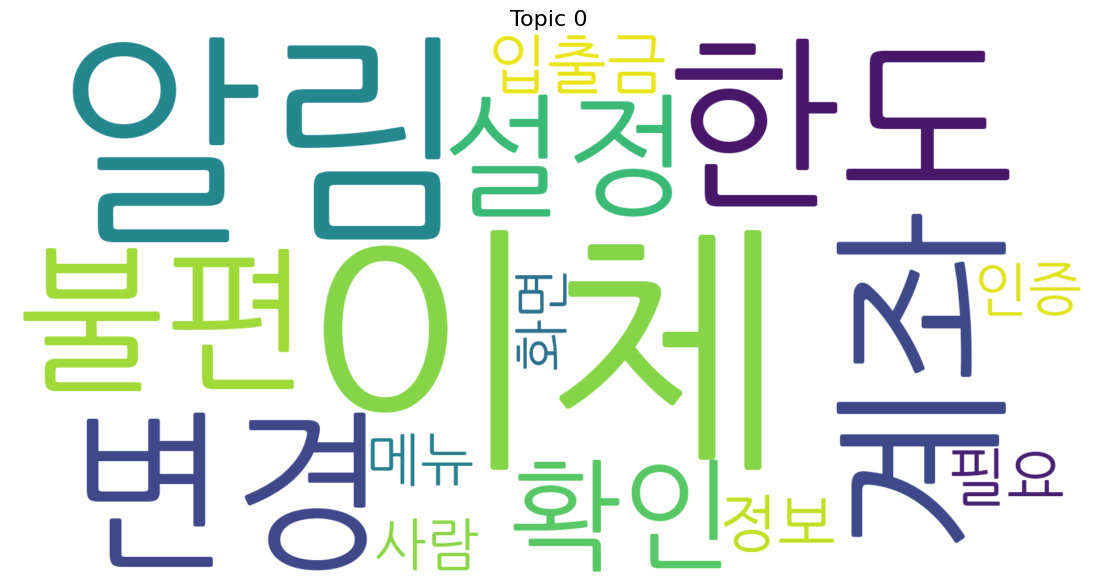

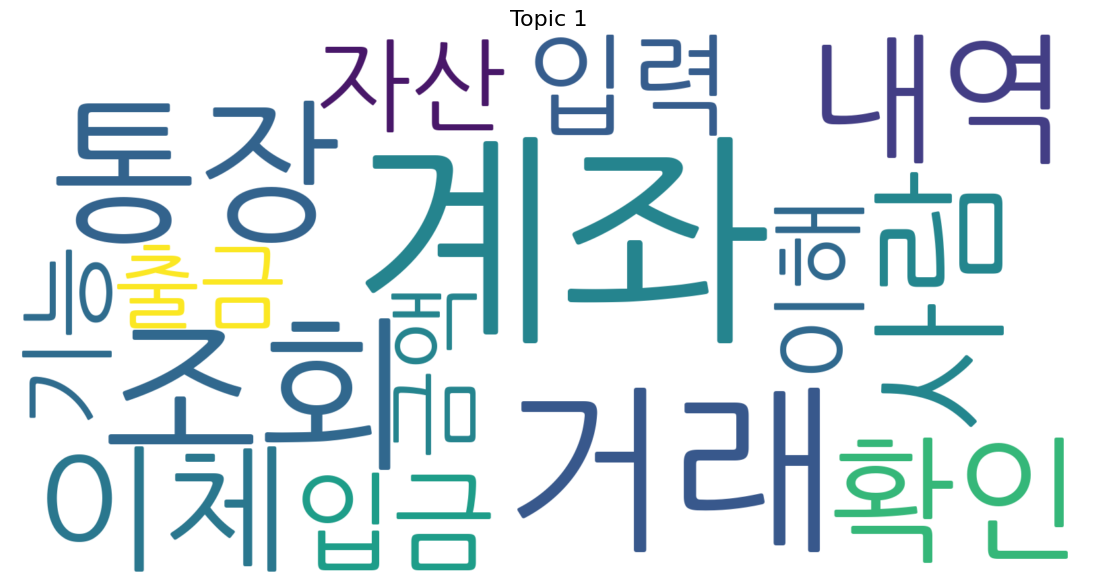

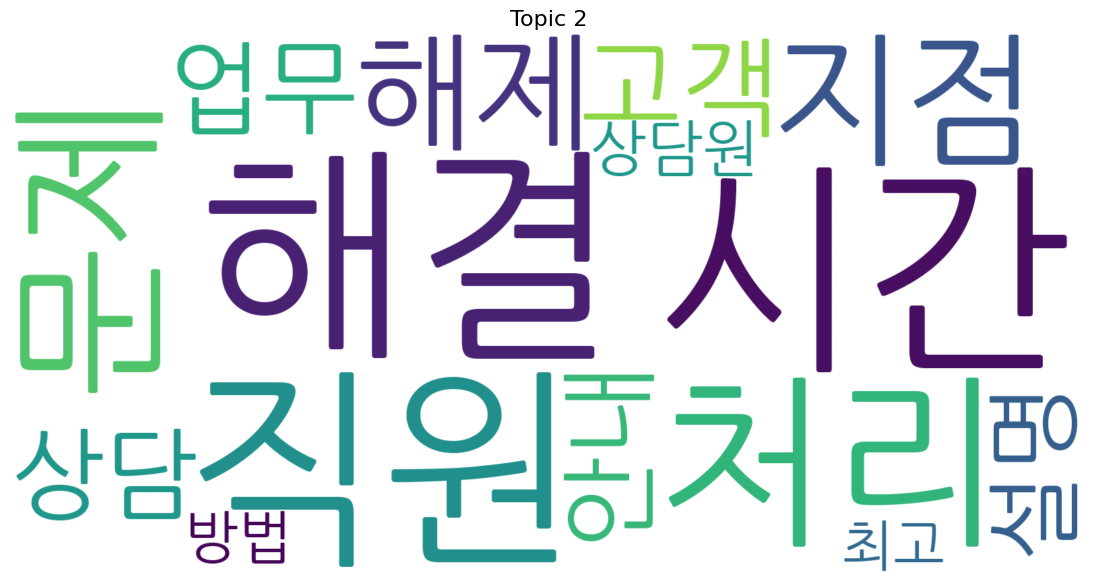

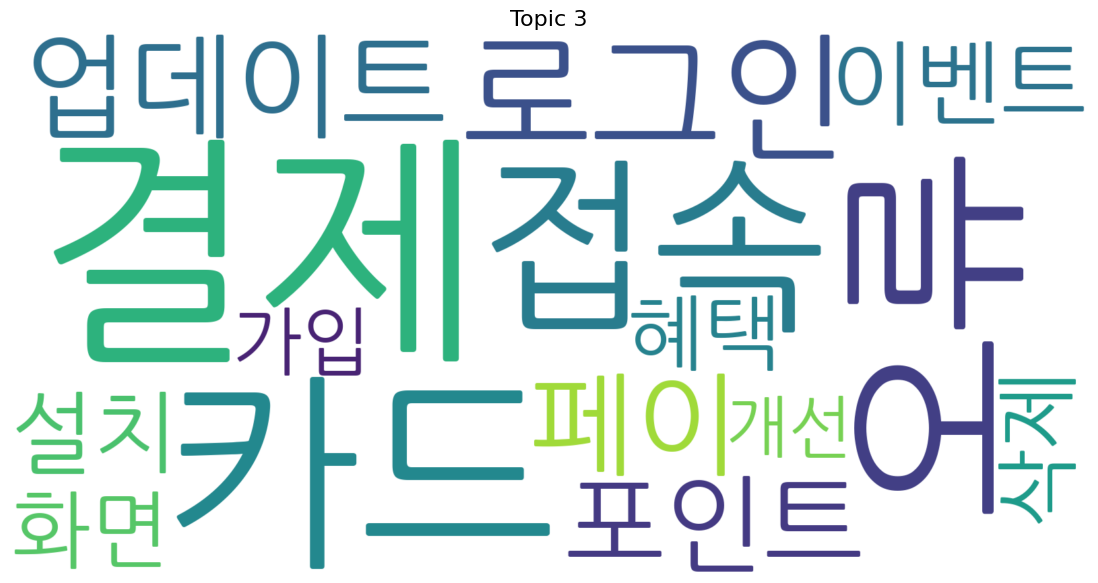

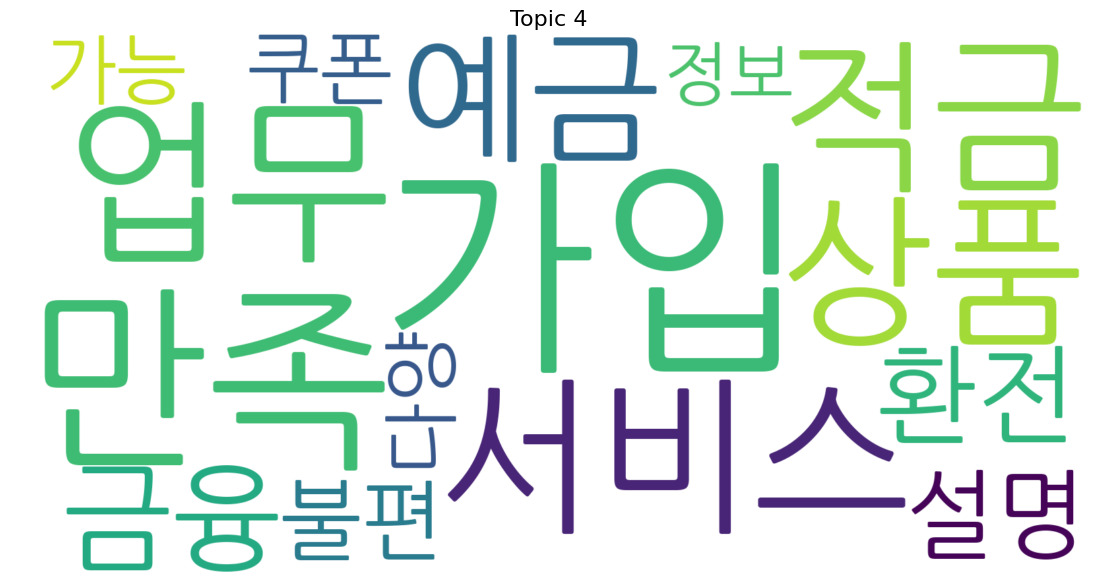

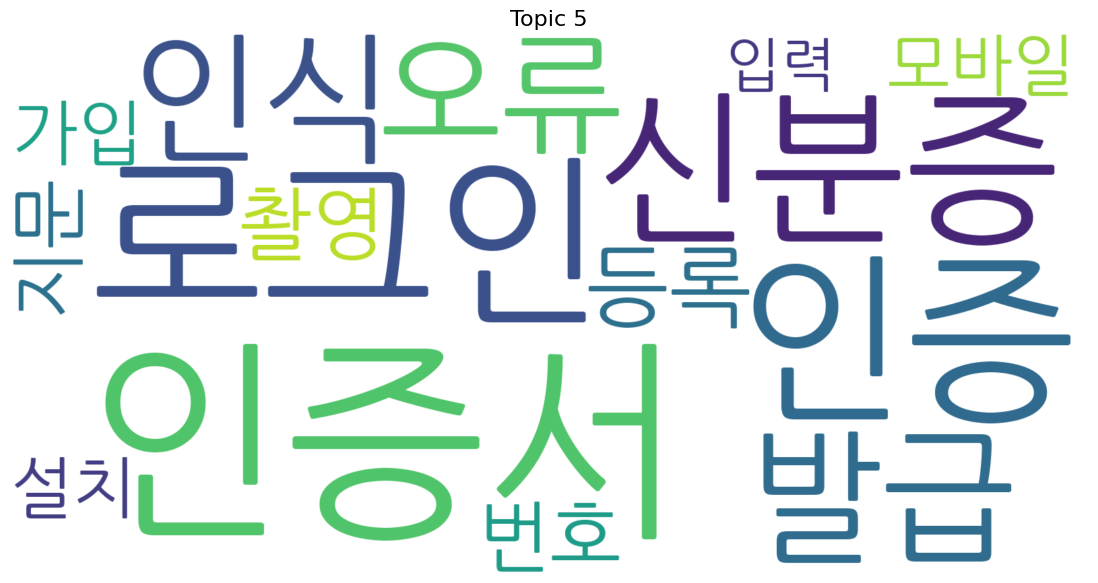

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 한글 글꼴 경로 설정 (Colab에서는 /usr/share/fonts/truetype/nanum/NanumGothic.ttf 경로를 사용할 수 있습니다.)
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # Colab에서 사용할 때 경로

# 각 토픽에 대해 워드 클라우드 생성
def generate_wordcloud_for_topic(lda_model, topic_num, num_words=15):
    # 토픽에서 주요 단어를 추출
    words = lda_model.show_topic(topic_num, num_words)
    word_dict = {word: weight for word, weight in words}

    # 워드 클라우드 생성 (한글 글꼴 적용)
    wordcloud = WordCloud(font_path=font_path, width=1600, height=800, background_color='white').generate_from_frequencies(word_dict)

    # 워드 클라우드 표시 (가로로 긴 화면 설정)
    plt.figure(figsize=(15, 7))  # 가로로 긴 크기 설정
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # 축 숨기기
    plt.title(f"Topic {topic_num}", fontsize=16)
    plt.show()

# LDA 모델에서 각 토픽에 대해 워드 클라우드 생성
num_topics = 6  # 토픽 수에 맞게 설정
for i in range(num_topics):
    generate_wordcloud_for_topic(lda_model, i)
